# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
emp_df = pd.read_csv('Human_Resources.csv')

In [3]:
emp_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
emp_df.shape

(1470, 35)

In [5]:
emp_df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# Problem Statement

# To predict who is willing leave the company based on the previous data

In [6]:
emp_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
emp_df.columns.value_counts().sum()

35

In [8]:
emp_df.count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

In [9]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
emp_df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [11]:
emp_df.DistanceFromHome.max()

29

In [12]:
emp_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Value Counts

In [13]:
for col in list(emp_df):
    print(col)
    print(emp_df[col].unique())

Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition
['Yes' 'No']
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496

In [14]:
emp_df.YearsAtCompany.unique()  #Difference between unique and nunique

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23], dtype=int64)

In [15]:
emp_df.YearsAtCompany.nunique()

37

In [16]:
print('List of Unique Values in the Dataset are:')
for col in list(emp_df):
    print(col,emp_df[col].nunique(), sep='--->') 

List of Unique Values in the Dataset are:
Age--->43
Attrition--->2
BusinessTravel--->3
DailyRate--->886
Department--->3
DistanceFromHome--->29
Education--->5
EducationField--->6
EmployeeCount--->1
EmployeeNumber--->1470
EnvironmentSatisfaction--->4
Gender--->2
HourlyRate--->71
JobInvolvement--->4
JobLevel--->5
JobRole--->9
JobSatisfaction--->4
MaritalStatus--->3
MonthlyIncome--->1349
MonthlyRate--->1427
NumCompaniesWorked--->10
Over18--->1
OverTime--->2
PercentSalaryHike--->15
PerformanceRating--->2
RelationshipSatisfaction--->4
StandardHours--->1
StockOptionLevel--->4
TotalWorkingYears--->40
TrainingTimesLastYear--->7
WorkLifeBalance--->4
YearsAtCompany--->37
YearsInCurrentRole--->19
YearsSinceLastPromotion--->16
YearsWithCurrManager--->18


# Missing Values

In [17]:
emp_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Seeing Missing Values in heatmap (Graphical View)

<AxesSubplot:>

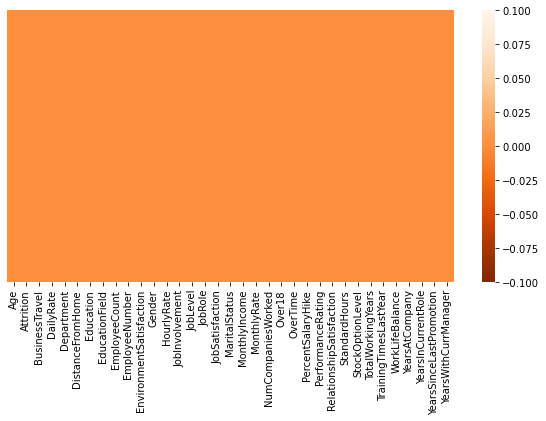

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(emp_df.isnull(), xticklabels= True, yticklabels= False, cbar=True, cmap= 'Oranges_r')

# Exploratory Data Analysis

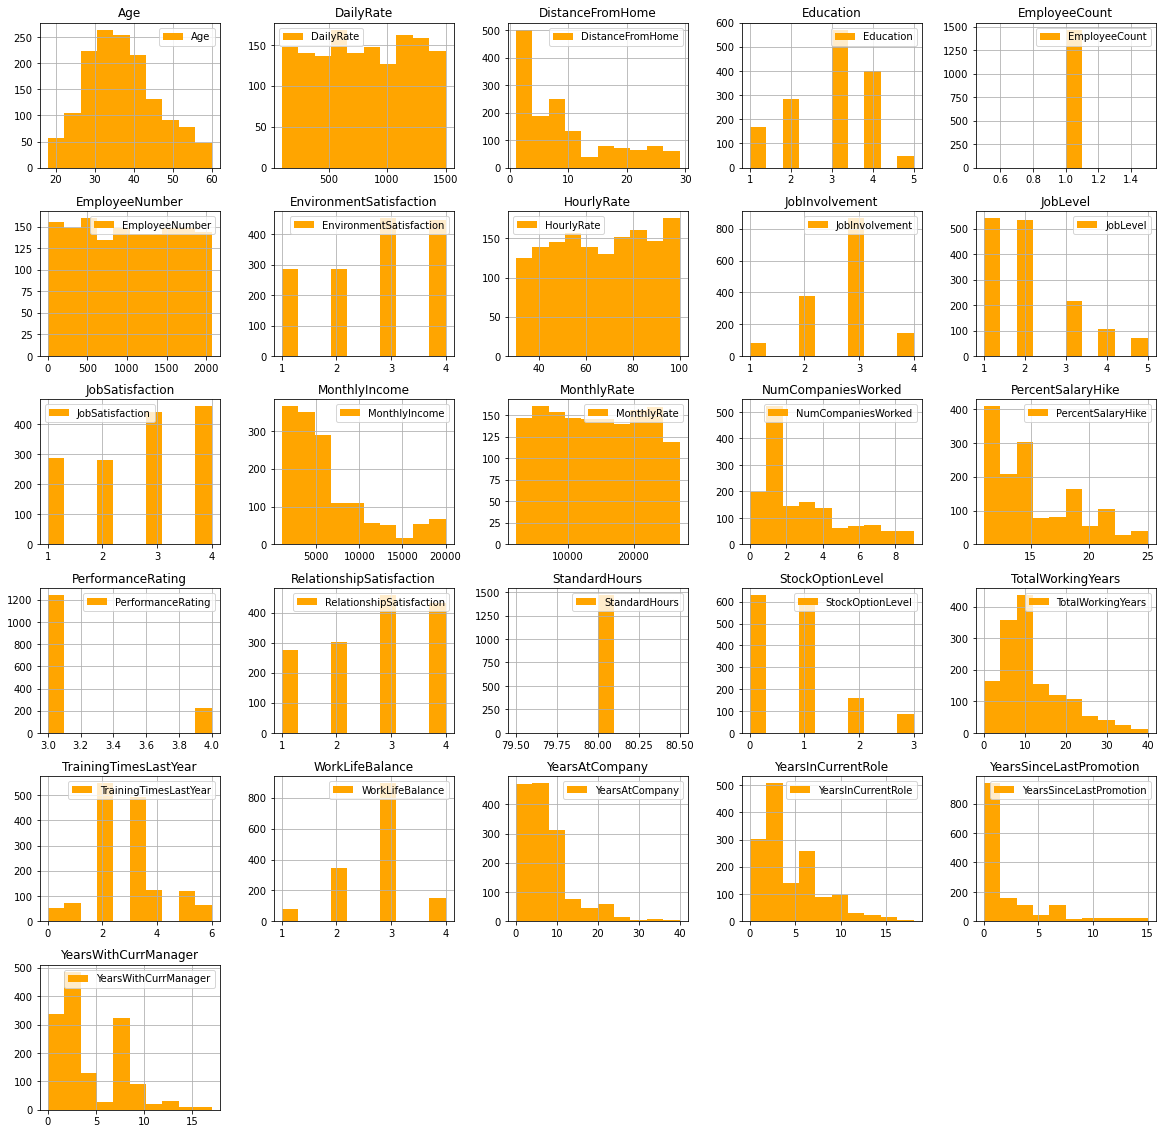

In [19]:
fig = emp_df.hist(bins=10, figsize= (20,20), legend=True, grid = True, xlabelsize = 10, ylabelsize= 10,xrot = 0, yrot = 0, color = 'orange')
plt.show()

#xlabelsize---> X value Size
#xrot = rotation of x value (90 or 0)

In [82]:
plt.savefig('fig.jpg') #Save the Figure

<Figure size 432x288 with 0 Axes>

# Count Plot

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

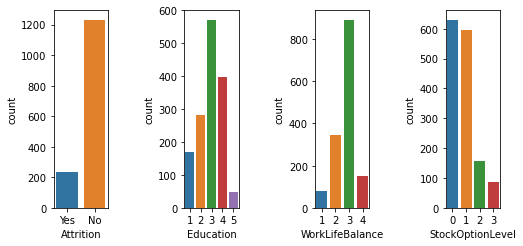

In [20]:
plt.figure(figsize=(8,8))
plt.subplot(2,7,1)
sns.countplot(emp_df['Attrition'])
plt.subplot(2,7,3)
sns.countplot(emp_df['Education'])
plt.subplot(2,7,5)
sns.countplot(emp_df['WorkLifeBalance'])
plt.subplot(2,7,7)
sns.countplot(emp_df['StockOptionLevel'])
plt.show()

# Droping Unwanted Columns

In [21]:
emp_df.drop(['EmployeeNumber', 'EmployeeCount', 'StandardHours','Over18'], axis = 1, inplace = True)

In [22]:
emp_df.columns.nunique()

31

# EDA on Attrition

In [23]:
emp_df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [24]:
left_emps = emp_df[emp_df['Attrition'] == 'Yes']
stayed_emps = emp_df[emp_df['Attrition']=='No']

In [127]:
left_emps.describe()

Age    DailyRate  DistanceFromHome   Education  \
count  237.000000   237.000000        237.000000  237.000000   
mean    33.607595   750.362869         10.632911    2.839662   
std      9.689350   401.899519          8.452525    1.008244   
min     18.000000   103.000000          1.000000    1.000000   
25%     28.000000   408.000000          3.000000    2.000000   
50%     32.000000   699.000000          9.000000    3.000000   
75%     39.000000  1092.000000         17.000000    4.000000   
max     58.000000  1496.000000         29.000000    5.000000   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement    JobLevel  \
count               237.000000  237.000000      237.000000  237.000000   
mean                  2.464135   65.573840        2.518987    1.637131   
std                   1.169791   20.099958        0.773405    0.940594   
min                   1.000000   31.000000        1.000000    1.000000   
25%                   1.000000   50.000000        2.000000    1.000000   
50%                   3.000000   66.000000        3.000000    1.000000   
75%                   4.000000   84.000000        3.000000    2.000000   
max                   4.000000  100.000000        4.000000    5.000000   

       JobSatisfaction  MonthlyIncome  ...  PerformanceRating  \
count       237.000000     237.000000  ...         237.000000   
mean          2.468354    4787.092827  ...           3.156118   
std           1.118058    3640.210367  ...           0.363735   
min           1.000000    1009.000000  ...           3.000000   
25%           1.000000    2373.000000  ...           3.000000   
50%           3.000000    3202.000000  ...           3.000000   
75%           3.000000    5916.000000  ...           3.000000   
max           4.000000   19859.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count                237.000000        237.000000         237.000000   
mean                   2.599156          0.527426           8.244726   
std                    1.125437          0.856361           7.169204   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           3.000000   
50%                    3.000000          0.000000           7.000000   
75%                    4.000000          1.000000          10.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count             237.000000       237.000000      237.000000   
mean                2.624473         2.658228        5.130802   
std                 1.254784         0.816453        5.949984   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        1.000000   
50%                 2.000000         3.000000        3.000000   
75%                 3.000000         3.000000        7.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count          237.000000               237.000000            237.000000  
mean             2.902954                 1.945148              2.852321  
std              3.174827                 3.153077              3.143349  
min              0.000000                 0.000000              0.000000  
25%              0.000000                 0.000000              0.000000  
50%              2.000000                 1.000000              2.000000  
75%              4.000000                 2.000000              5.000000  
max             15.000000                15.000000             14.000000  

[8 rows x 23 columns]

<AxesSubplot:xlabel='JobSatisfaction', ylabel='MonthlyIncome'>

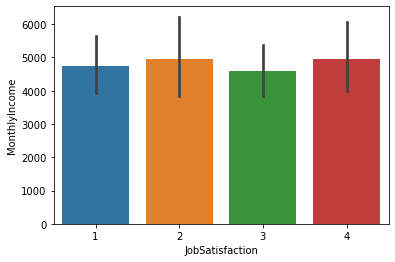

In [25]:
sns.barplot(data = left_emps, x= 'JobSatisfaction', y = 'MonthlyIncome')

In [26]:
stayed_emps.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1233.000000  1233.000000       1233.000000  1233.000000   
mean     37.561233   812.504461          8.915653     2.927007   
std       8.888360   403.208379          8.012633     1.027002   
min      18.000000   102.000000          1.000000     1.000000   
25%      31.000000   477.000000          2.000000     2.000000   
50%      36.000000   817.000000          7.000000     3.000000   
75%      43.000000  1176.000000         13.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1233.000000  1233.000000     1233.000000  1233.000000   
mean                  2.771290    65.952149        2.770479     2.145985   
std                   1.071132    20.380754        0.692050     1.117933   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome  ...  PerformanceRating  \
count      1233.000000    1233.000000  ...        1233.000000   
mean          2.778589    6832.739659  ...           3.153285   
std           1.093277    4818.208001  ...           0.360408   
min           1.000000    1051.000000  ...           3.000000   
25%           2.000000    3211.000000  ...           3.000000   
50%           3.000000    5204.000000  ...           3.000000   
75%           4.000000    8834.000000  ...           3.000000   
max           4.000000   19999.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1233.000000       1233.000000        1233.000000   
mean                   2.733982          0.845093          11.862936   
std                    1.071603          0.841985           7.760719   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          16.000000   
max                    4.000000          3.000000          38.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1233.000000      1233.000000     1233.000000   
mean                2.832928         2.781022        7.369019   
std                 1.293585         0.681907        6.096298   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        6.000000   
75%                 3.000000         3.000000       10.000000   
max                 6.000000         4.000000       37.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1233.000000              1233.000000           1233.000000  
mean             4.484185                 2.234388              4.367397  
std              3.649402                 3.234762              3.594116  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 23 columns]

<AxesSubplot:xlabel='Attrition', ylabel='count'>

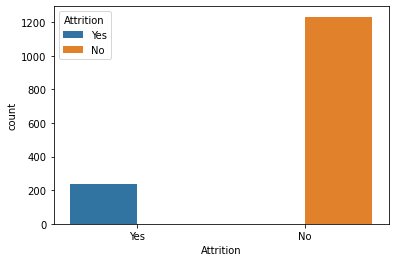

In [27]:
sns.countplot(x = 'Attrition', data = emp_df, hue = 'Attrition')

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

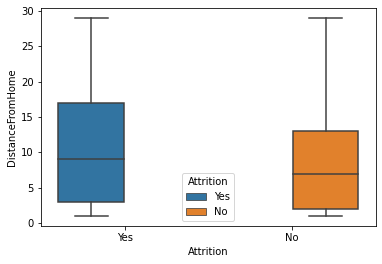

In [28]:
sns.boxplot(data = emp_df, x= 'Attrition', y = 'DistanceFromHome', hue = 'Attrition')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Age'>

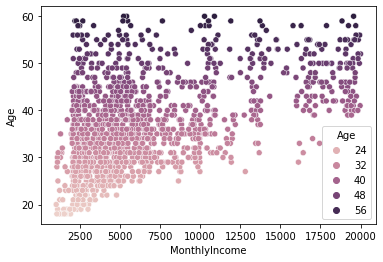

In [29]:
sns.scatterplot(data = emp_df, x= 'MonthlyIncome', y= 'Age', hue = 'Age')

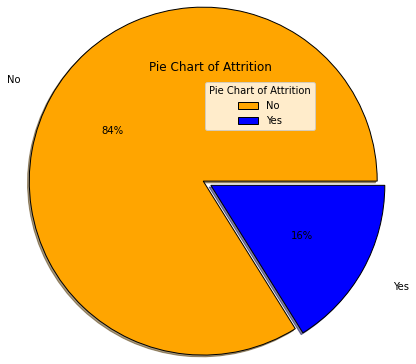

In [30]:
x = emp_df.Attrition.value_counts()
plt.pie(x, labels=x.index, colors=['orange', 'blue'], autopct='%1.0f%%', 
        explode = [0.1,0],shadow=True ,radius= 2, 
        wedgeprops={'edgecolor':'black'}, labeldistance = 1.2)
plt.legend(title = 'Pie Chart of Attrition')
plt.title('Pie Chart of Attrition')
plt.show()

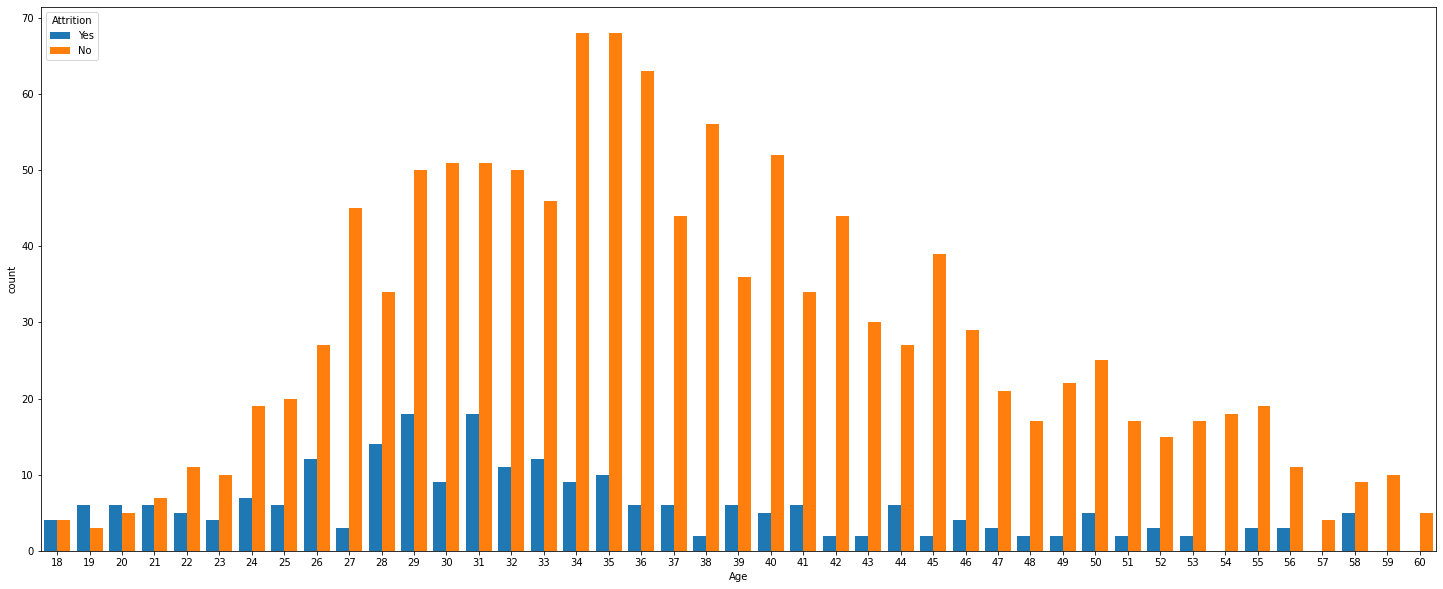

In [31]:
plt.figure(figsize=(25,10))
sns.countplot(data = emp_df, x= 'Age',hue = 'Attrition' , saturation= 1, dodge=True )
plt.show()

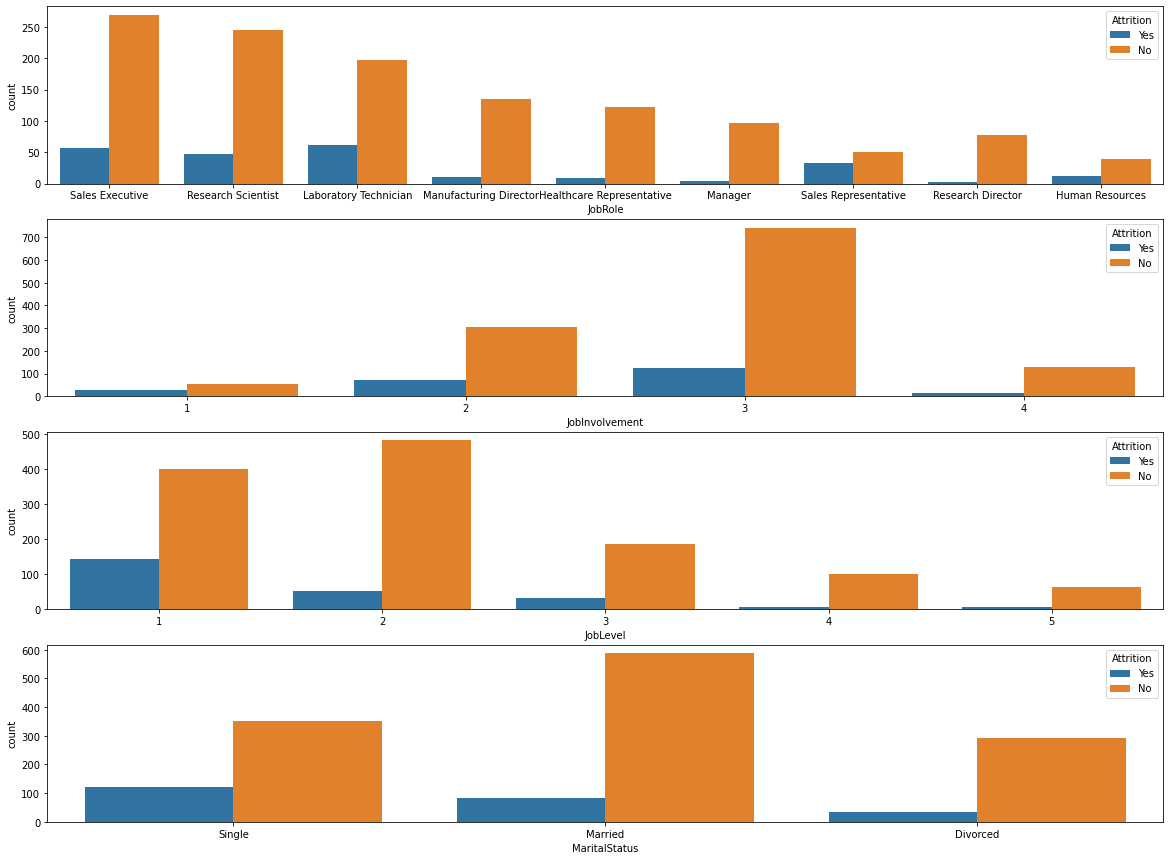

In [32]:
plt.figure(figsize=(20,15))
plt.subplot(4,1,1)
sns.countplot(data = emp_df, x= 'JobRole', hue='Attrition', )
plt.subplot(4,1,2)
sns.countplot(data = emp_df, x= 'JobInvolvement', hue = 'Attrition')
plt.subplot(4,1,3)
sns.countplot(data = emp_df, x= 'JobLevel', hue = 'Attrition')
plt.subplot(4,1,4)
sns.countplot(data = emp_df, x= 'MaritalStatus', hue = 'Attrition')
plt.show()

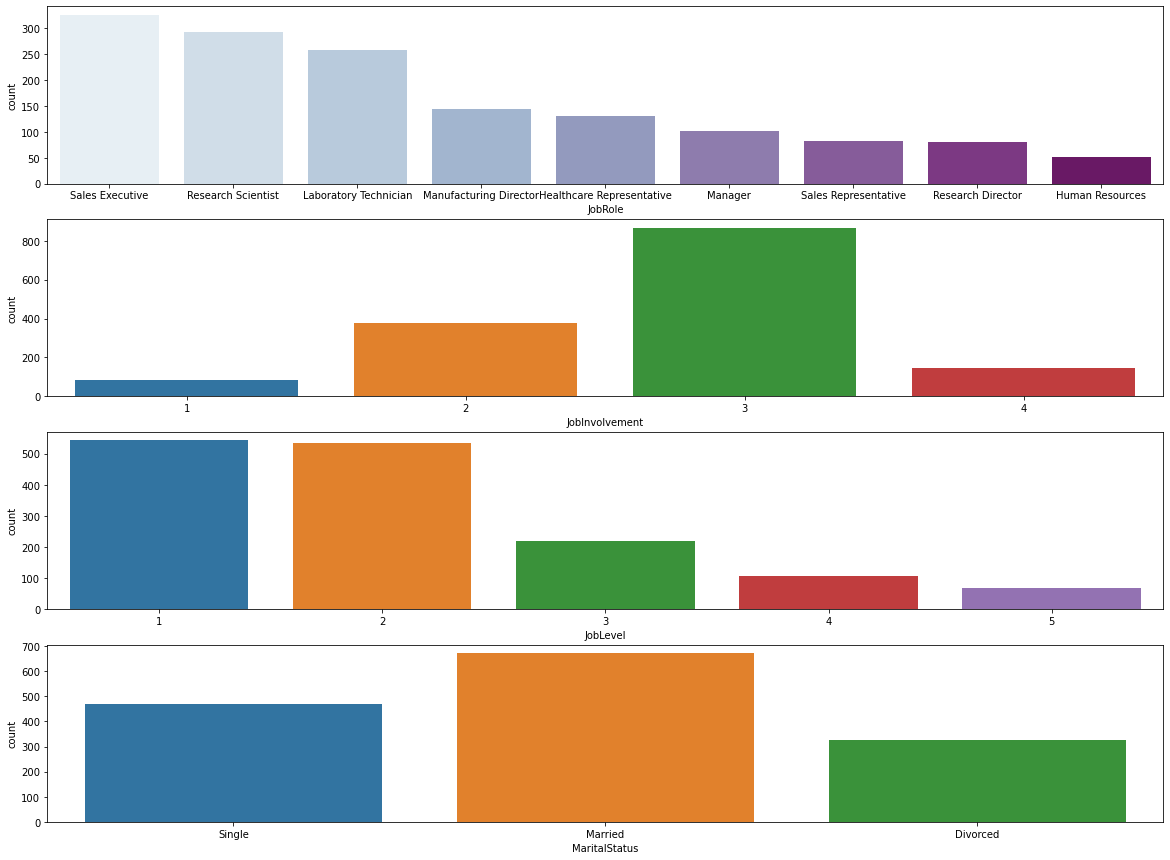

In [33]:
plt.figure(figsize=(20,15))
plt.subplot(4,1,1)
sns.countplot(data = emp_df, x= 'JobRole', hue_order='Attrition', palette= 'BuPu')
plt.subplot(4,1,2)
sns.countplot(data = emp_df, x= 'JobInvolvement', hue_order = 'Attrition')
plt.subplot(4,1,3)
sns.countplot(data = emp_df, x= 'JobLevel', hue_order = 'Attrition')
plt.subplot(4,1,4)
sns.countplot(data = emp_df, x= 'MaritalStatus', hue_order = 'Attrition')
plt.show()

# KDE Plot(Kernal Density Estimation)

Text(0.5, 1.0, 'Left vs Stayed on Distance From Home Basis')

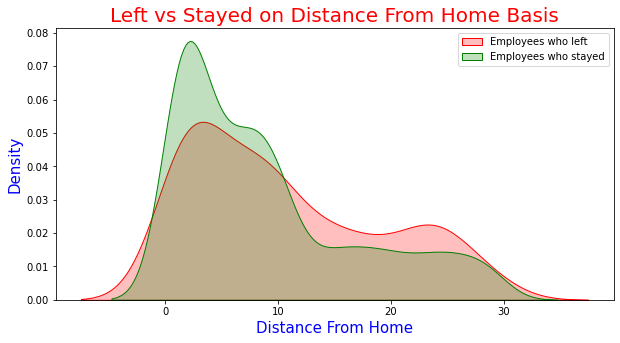

In [72]:
plt.figure(figsize=(10,5))
sns.kdeplot(left_emps['DistanceFromHome'], label = 'Employees who left', color='r', shade=True)
sns.kdeplot(stayed_emps['DistanceFromHome'], label = 'Employees who stayed', color='g', shade=True)
plt.ylabel('Density',fontdict={'size':'15'}, color = 'blue')
plt.xlabel('Distance From Home', fontdict={'size':'15',}, color = 'blue')
plt.legend()
plt.title('Left vs Stayed on Distance From Home Basis', fontdict= {'size':'20'},color = 'red')

# We can see it by distplot also

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


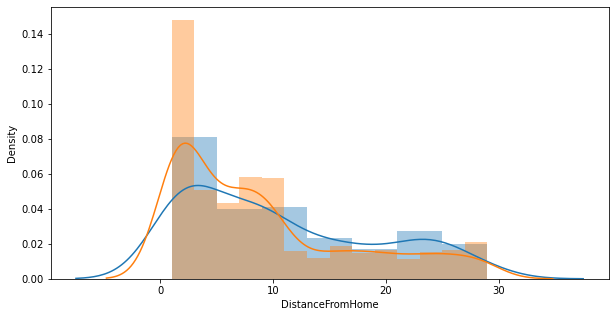

In [70]:
plt.figure(figsize=(10,5))
sns.distplot(left_emps['DistanceFromHome'])
sns.distplot(stayed_emps['DistanceFromHome'])
plt.show()

Text(0.5, 1.0, 'Left vs Stayed on Years they worked Basis')

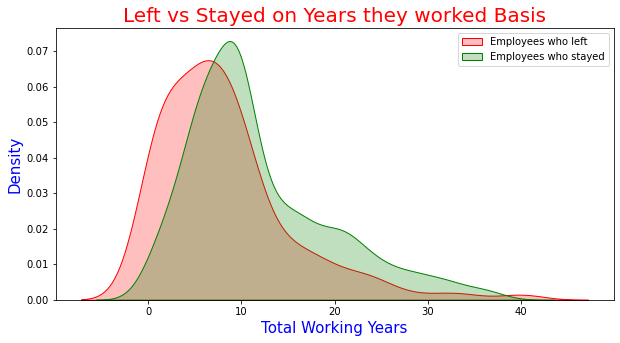

In [73]:
plt.figure(figsize=(10,5))
sns.kdeplot(left_emps['TotalWorkingYears'], label = 'Employees who left', color='r', shade=True)
sns.kdeplot(stayed_emps['TotalWorkingYears'], label = 'Employees who stayed', color='g', shade=True)
plt.ylabel('Density',fontdict={'size':'15'}, color = 'blue')
plt.xlabel('Total Working Years', fontdict={'size':'15',}, color = 'blue')
plt.legend()
plt.title('Left vs Stayed on Years they worked Basis', fontdict= {'size':'20'},color = 'red')

# Gender vs Monthly Income

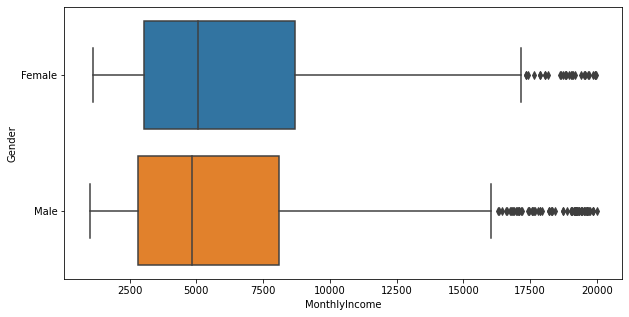

In [77]:
plt.figure(figsize=(10,5))
sns.boxplot(data = emp_df, y = 'Gender', x = 'MonthlyIncome')
plt.show()

# Gender Vs Attrition

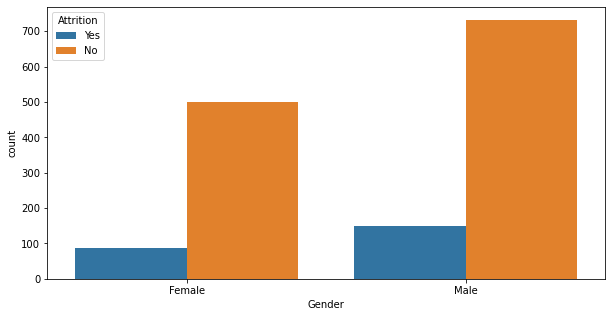

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(data = emp_df, x = 'Gender', hue='Attrition')
plt.show()

# Job Role vs Monthly Income

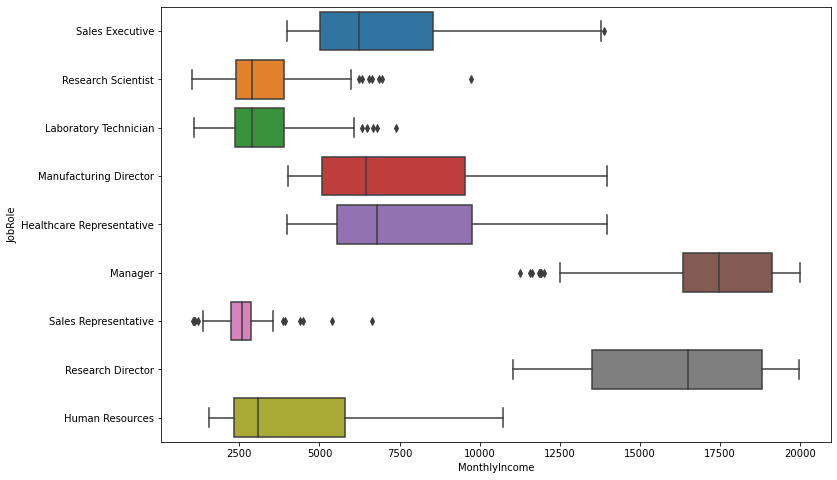

In [90]:
plt.figure(figsize=(12,8))
sns.boxplot(data = emp_df, y = 'JobRole', x ='MonthlyIncome', )
plt.show()

# Monthly Income vs Age (Using Violin Plot)

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

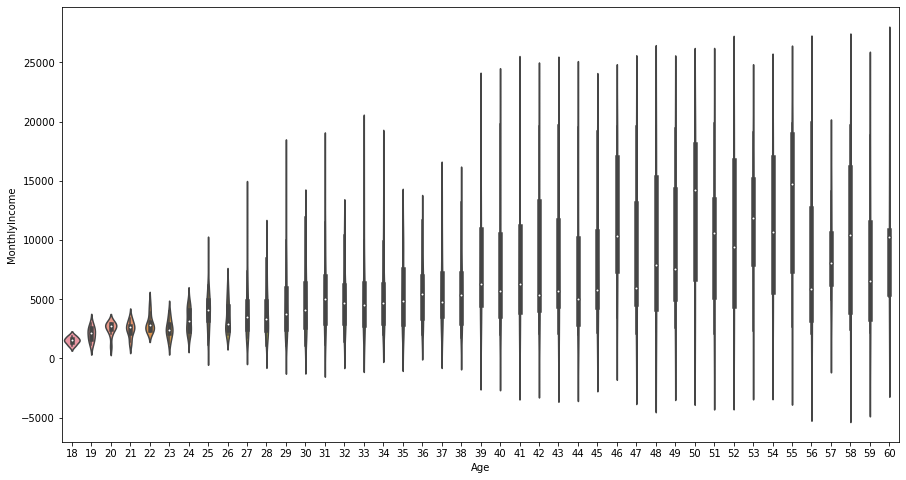

In [99]:
plt.figure(figsize=(15,8))
sns.violinplot(data = emp_df, y = 'MonthlyIncome', x ='Age' )

# JobInvolvement vs YearsSinceLastPromotion(CatPlot)

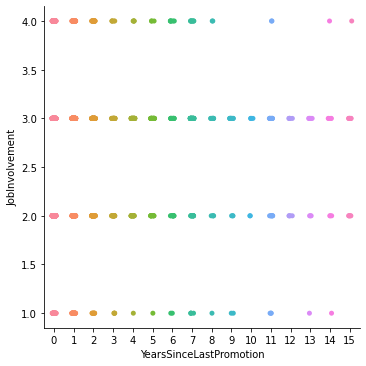

In [101]:
sns.catplot(data = emp_df, y = 'JobInvolvement', x ='YearsSinceLastPromotion' )

# No.Of Companies Worked vs Monthly Income(Stripplot)

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='MonthlyIncome'>

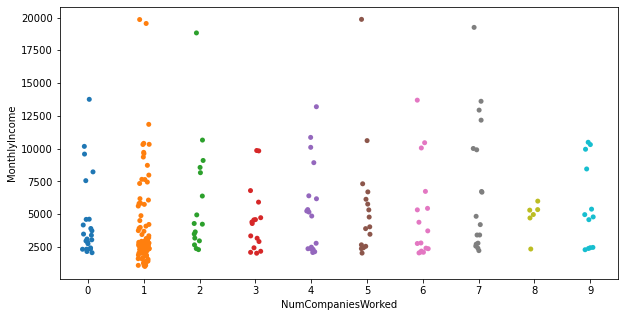

In [110]:
plt.figure(figsize=(10,5))
sns.stripplot(data = left_emps, x = 'NumCompaniesWorked', y ='MonthlyIncome' )

# JobLevel vs Jobstaisfaction(SwarmPlot)

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


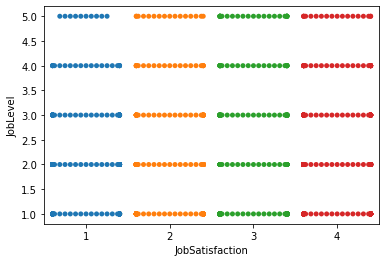

In [118]:
sns.swarmplot(data = emp_df, y = 'JobLevel', x ='JobSatisfaction' )
plt.show()

# Feature Importance

In [121]:
emp_df.corr()
#Convert dataset in to matrix form

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  ...  \
Age                       0.509604        -0.004892       0.497855  ...   
DailyRate                 0.002966         0.030571       0.007

In [ ]:
#For Categorical Data we dont have correlation data

In [127]:
emp_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [130]:
emp_df.columns.size

31

In [128]:
emp_df.corr().columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [129]:
emp_df.corr().columns.size

23

<AxesSubplot:>

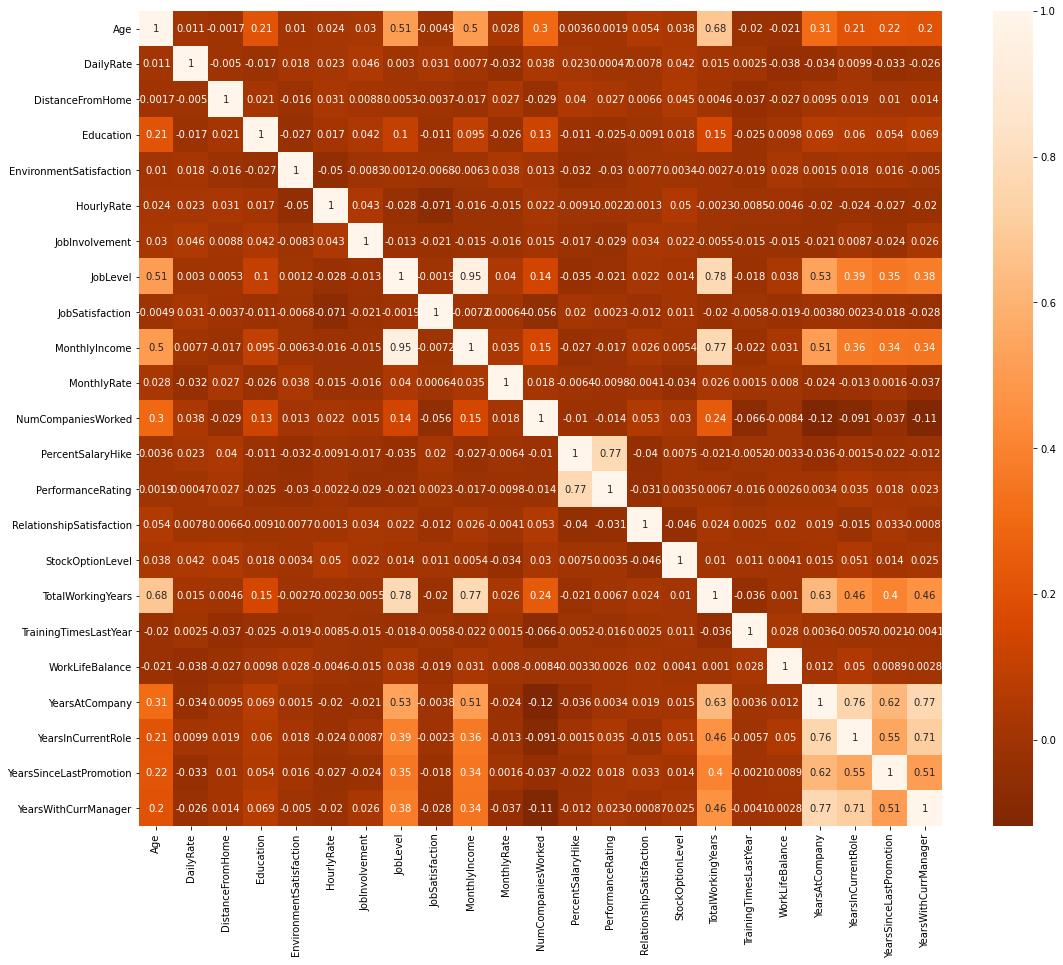

In [134]:
plt.figure(figsize=(18,15))
sns.heatmap(emp_df.corr(), cmap= 'Oranges_r', annot=True)

In [ ]:
# Converting Categorical variable(Attrition) to Integer type

In [136]:
from sklearn.preprocessing import LabelEncoder
ale = LabelEncoder()

In [138]:
emp_df['Attrition'] = ale.fit_transform(emp_df['Attrition'])

In [139]:
emp_df.corr()

Age  Attrition  DailyRate  DistanceFromHome  \
Age                       1.000000  -0.159205   0.010661         -0.001686   
Attrition                -0.159205   1.000000  -0.056652          0.077924   
DailyRate                 0.010661  -0.056652   1.000000         -0.004985   
DistanceFromHome         -0.001686   0.077924  -0.004985          1.000000   
Education                 0.208034  -0.031373  -0.016806          0.021042   
EnvironmentSatisfaction   0.010146  -0.103369   0.018355         -0.016075   
HourlyRate                0.024287  -0.006846   0.023381          0.031131   
JobInvolvement            0.029820  -0.130016   0.046135          0.008783   
JobLevel                  0.509604  -0.169105   0.002966          0.005303   
JobSatisfaction          -0.004892  -0.103481   0.030571         -0.003669   
MonthlyIncome             0.497855  -0.159840   0.007707         -0.017014   
MonthlyRate               0.028051   0.015170  -0.032182          0.027473   
NumCompaniesWorked        0.299635   0.043494   0.038153         -0.029251   
PercentSalaryHike         0.003634  -0.013478   0.022704          0.040235   
PerformanceRating         0.001904   0.002889   0.000473          0.027110   
RelationshipSatisfaction  0.053535  -0.045872   0.007846          0.006557   
StockOptionLevel          0.037510  -0.137145   0.042143          0.044872   
TotalWorkingYears         0.680381  -0.171063   0.014515          0.004628   
TrainingTimesLastYear    -0.019621  -0.059478   0.002453         -0.036942   
WorkLifeBalance          -0.021490  -0.063939  -0.037848         -0.026556   
YearsAtCompany            0.311309  -0.134392  -0.034055          0.009508   
YearsInCurrentRole        0.212901  -0.160545   0.009932          0.018845   
YearsSinceLastPromotion   0.216513  -0.033019  -0.033229          0.010029   
YearsWithCurrManager      0.202089  -0.156199  -0.026363          0.014406   

                          Education  EnvironmentSatisfaction  HourlyRate  \
Age                        0.208034                 0.010146    0.024287   
Attrition                 -0.031373                -0.103369   -0.006846   
DailyRate                 -0.016806                 0.018355    0.023381   
DistanceFromHome           0.021042                -0.016075    0.031131   
Education                  1.000000                -0.027128    0.016775   
EnvironmentSatisfaction   -0.027128                 1.000000   -0.049857   
HourlyRate                 0.016775                -0.049857    1.000000   
JobInvolvement             0.042438                -0.008278    0.042861   
JobLevel                   0.101589                 0.001212   -0.027853   
JobSatisfaction           -0.011296                -0.006784   -0.071335   
MonthlyIncome              0.094961                -0.006259   -0.015794   
MonthlyRate               -0.026084                 0.037600   -0.015297   
NumCompaniesWorked         0.126317                 0.012594    0.022157   
PercentSalaryHike         -0.011111                -0.031701   -0.009062   
PerformanceRating         -0.024539                -0.029548   -0.002172   
RelationshipSatisfaction  -0.009118                 0.007665    0.001330   
StockOptionLevel           0.018422                 0.003432    0.050263   
TotalWorkingYears          0.148280                -0.002693   -0.002334   
TrainingTimesLastYear     -0.025100                -0.019359   -0.008548   
WorkLifeBalance            0.009819                 0.027627   -0.004607   
YearsAtCompany             0.069114                 0.001458   -0.019582   
YearsInCurrentRole         0.060236                 0.018007   -0.024106   
YearsSinceLastPromotion    0.054254                 0.016194   -0.026716   
YearsWithCurrManager       0.069065                -0.004999   -0.020123   

                          JobInvolvement  JobLevel  JobSatisfaction  ...  \
Age                             0.029820  0.509604        -0.004892  ...   
Attrition                  

<AxesSubplot:>

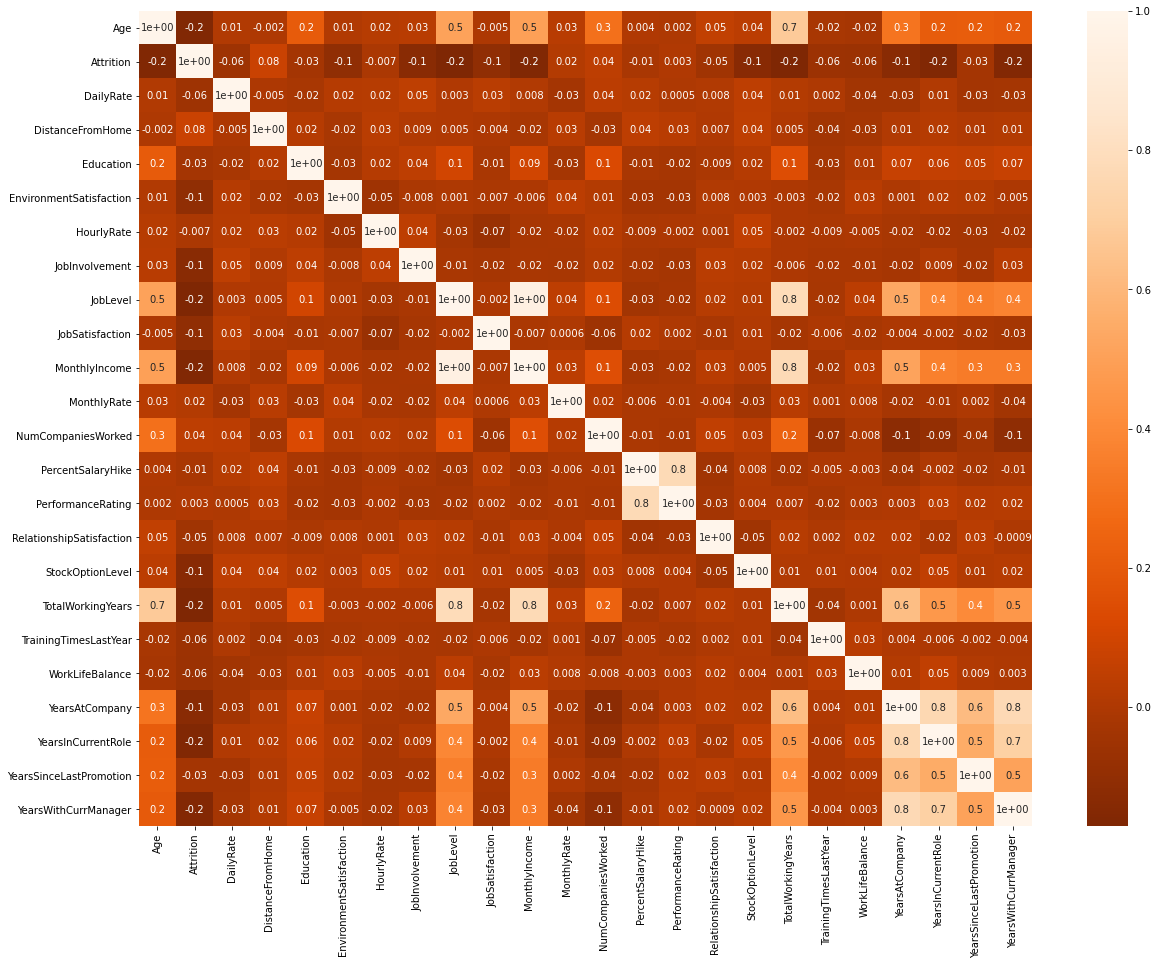

In [149]:
plt.figure(figsize=(20,15))
sns.heatmap(emp_df.corr(), cmap= 'Oranges_r', annot=True, fmt='0.1',annot_kws={'size':'10'})

In [155]:
emp_df.columns.size

31

In [194]:
 #numerical = emp_df._get_numeric_data()

In [196]:
#numerical

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0      41          1       1102                 1          2   
1      49          0        279                 8          1   
2      37          1       1373                 2          2   
3      33          0       1392                 3          4   
4      27          0        591                 2          1   
...   ...        ...        ...               ...        ...   
1465   36          0        884                23          2   
1466   39          0        613                 6          1   
1467   27          0        155                 4          3   
1468   49          0       1023                 2          3   
1469   34          0        628                 8          3   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                           2       0          94               3         2   
1                           3       1          61               2         2   
2                           4       1          92               2         1   
3                           4       0          56               3         1   
4                           1       1          40               3         1   
...                       ...     ...         ...             ...       ...   
1465                        3       1          41               4         2   
1466                        4       1          42               2         3   
1467                        2       1          87               4         2   
1468                        4       1          63               2         2   
1469                        2       1          82               4         2   

      ...  JobRole_Research Scientist  JobRole_Sales Executive  \
0     ...                           0                        1   
1     ...                           1                        0   
2     ...                           0                        0   
3     ...                           1                        0   
4     ...                           0                        0   
...   ...                         ...                      ...   
1465  ...                           0                        0   
1466  ...                           0                        0   
1467  ...                           0                        0   
1468  ...                           0                        1   
1469  ...                           0                        0   

      JobRole_Sales Representative  MaritalStatus_Married  \
0                                0                      0   
1                                0                      1   
2                                0                      0   
3                                0                      1   
4                                0                      1   
...                            ...                    ...   
1465                             0                      1   
1466                             0                      1   
1467                             0                      1   
1468                             0                      1   
1469                             0                      1   

      MaritalStatus_Single  EducationField_Life Sciences  \
0                        1                             1   
1                        0                             1   
2                        1                             0   
3                        0                             1   
4                        0                             0   
...                    ...                           ...   
1465                     0                             0   
1466                     0                             0   
1467                     0                             1   
1468                     0                             0   
1469                     0                             0   

      EducationField_Marketing  Education

In [195]:
 #emp_df._get_numeric_data().columns.size

45

In [157]:
31-24 

7

# Following are the nominal data so we are going to apply onehot encoding

In [158]:
emp_df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [159]:
emp_df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [160]:
emp_df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [170]:
emp_df.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [178]:
emp_df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [171]:
cat = emp_df[['BusinessTravel', 'Department','JobRole','MaritalStatus','EducationField']]

In [172]:
cat = pd.get_dummies(cat, drop_first=True)
#Drop first is to avoid Dummy variable trap
#from every column one unnique value eliminated

In [175]:
cat.head()

BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 0                             1   
3                                 1                             0   
4                                 0                             1   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   
3                                  1                 0   
4                                  1                 0   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                        0                              0                0   
1                        0                              0                0   
2                        0                              1                0   
3                        0                              0                0   
4                        0                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                             0                      0                     1   
1                             0                      1                     0   
2                             0                      0                     1   
3                             0                      1                     0   
4                             0                      1                     0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   
2                             0                         0   
3                             1                         0   
4                             0                         0   

   EducationField_Medical  EducationField_Other  \
0                       0                     0   
1                       0                     0   
2                       0                     1   
3                       0                     0   
4                       1                     0   

   EducationField_Technical Degree  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0

In [176]:
cat.columns

Index(['BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree'],
      dtype='object')

In [177]:
cat.columns.size

19

# Label Encoding

In [181]:
emp_df.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [182]:
emp_df.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [183]:
from sklearn.preprocessing import LabelEncoder
ale = LabelEncoder()

In [185]:
emp_df['Gender'] = ale.fit_transform(emp_df['Gender'])
emp_df['OverTime'] = ale.fit_transform(emp_df['OverTime'])

# Concatinating all the colums

In [197]:
numerical = emp_df[['Age', 'Attrition', 'DailyRate', 
       'DistanceFromHome', 'Education', 
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [201]:
numerical.columns.size

26

In [198]:
emp_df = pd.concat([cat,numerical],axis=1)

In [202]:
emp_df.head()

BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 0                             1   
3                                 1                             0   
4                                 0                             1   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   
3                                  1                 0   
4                                  1                 0   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                        0                              0                0   
1                        0                              0                0   
2                        0                              1                0   
3                        0                              0                0   
4                        0                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  ...  PerformanceRating  \
0                           0  ...                  3   
1                           1  ...                  4   
2                           0  ...                  3   
3                           1  ...                  3   
4                           0  ...                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2  

[5 rows x 45 columns]

In [203]:
emp_df.dtypes

BusinessTravel_Travel_Frequently     uint8
BusinessTravel_Travel_Rarely         uint8
Department_Research & Development    uint8
Department_Sales                     uint8
JobRole_Human Resources              uint8
JobRole_Laboratory Technician        uint8
JobRole_Manager                      uint8
JobRole_Manufacturing Director       uint8
JobRole_Research Director            uint8
JobRole_Research Scientist           uint8
JobRole_Sales Executive              uint8
JobRole_Sales Representative         uint8
MaritalStatus_Married                uint8
MaritalStatus_Single                 uint8
EducationField_Life Sciences         uint8
EducationField_Marketing             uint8
EducationField_Medical               uint8
EducationField_Other                 uint8
EducationField_Technical Degree      uint8
Age                                  int64
Attrition                            int64
DailyRate                            int64
DistanceFromHome                     int64
Education  

# Feature Importance

In [204]:
x = emp_df.drop('Attrition', axis = 1)
y = emp_df['Attrition']

In [205]:
from sklearn.ensemble import ExtraTreesRegressor
fi = ExtraTreesRegressor()
fi.fit(x,y)

ExtraTreesRegressor()

In [206]:
fi.feature_importances_
#Except attrition we have all columns here

array([0.02330074, 0.01013362, 0.0052338 , 0.00630663, 0.00669181,
       0.01691609, 0.00307135, 0.0150223 , 0.00158847, 0.01608468,
       0.0175331 , 0.01208604, 0.01125263, 0.0386788 , 0.0094417 ,
       0.01191106, 0.01461742, 0.00697747, 0.01542746, 0.04195277,
       0.02694055, 0.03563333, 0.02235357, 0.03740626, 0.02031746,
       0.02186149, 0.03375571, 0.04200575, 0.03689702, 0.03731432,
       0.02043777, 0.02942323, 0.06057407, 0.02205769, 0.00888763,
       0.0335888 , 0.02558623, 0.03018467, 0.02457715, 0.04009461,
       0.02698374, 0.02270132, 0.02699989, 0.02918979])

In [217]:
fi.feature_importances_.size

44

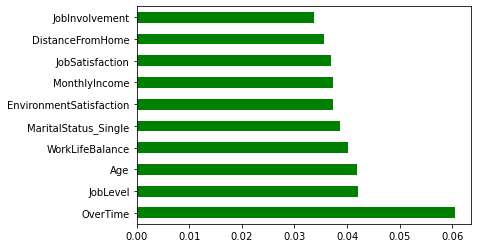

In [214]:
feat_imp = pd.Series(fi.feature_importances_, index=x.columns)
feat_imp.nlargest(10).plot(kind = 'barh', color = 'green')
plt.show()

# Sliptting the data set

In [216]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.75, random_state = 10)

# Feature Scalling with Normalization

In [225]:
from sklearn.preprocessing import MinMaxScaler
nor_scal = MinMaxScaler()

In [226]:
x_train =nor_scal.fit_transform(x_train)

In [227]:
x_test =nor_scal.fit_transform(x_test)

# Models : Logistic Regression

In [230]:
from sklearn.linear_model import LogisticRegression
lrm =LogisticRegression()
lrm.fit(x_train,y_train)

LogisticRegression()

In [232]:
lrm_y_pred = lrm.predict(x_test)

In [234]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [236]:
lrm_score = accuracy_score(lrm_y_pred, y_test)

In [237]:
lrm_score

0.8804347826086957

In [238]:
cm =confusion_matrix(lrm_y_pred, y_test)

In [239]:
cm

array([[296,  40],
       [  4,  28]], dtype=int64)

<AxesSubplot:>

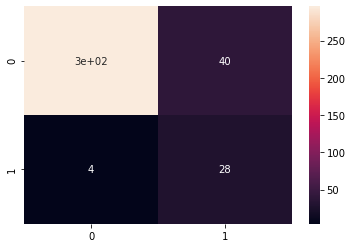

In [242]:
sns.heatmap(cm,annot=True)

In [244]:
print(classification_report(y_test,lrm_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       300
           1       0.88      0.41      0.56        68

    accuracy                           0.88       368
   macro avg       0.88      0.70      0.75       368
weighted avg       0.88      0.88      0.86       368



# Model : Random Forest Classifier

In [247]:
from sklearn.ensemble import RandomForestClassifier
rfcm = RandomForestClassifier()
rfcm.fit(x_train,y_train)

RandomForestClassifier()

In [248]:
rfcm_y_pred= rfcm.predict(x_test)

In [249]:
rfcm_y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [251]:
rfcm_score = accuracy_score(y_test,rfcm_y_pred)

In [252]:
rfcm_score

0.842391304347826

In [253]:
rfcm_cm =confusion_matrix(rfcm_y_pred, y_test)

In [254]:
rfcm_cm

array([[298,  56],
       [  2,  12]], dtype=int64)

<AxesSubplot:>

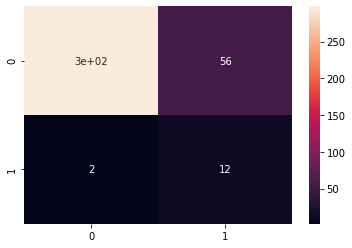

In [255]:
sns.heatmap(rfcm_cm,annot=True)

In [257]:
print(classification_report(y_test,rfcm_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       300
           1       0.86      0.18      0.29        68

    accuracy                           0.84       368
   macro avg       0.85      0.58      0.60       368
weighted avg       0.84      0.84      0.80       368



# Model : SVM with Hyper parameter tuning

In [260]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC()

In [268]:
parameters = {"kernel":['linear', 'poly', 'rbf'], 
             'C':[0.001,0.01,0.1,1,10], 'degree':[1,2,3,4,5,6,7], 
              'gamma':[0.001,0.1,1,2,5,10,100]}

gv = GridSearchCV(svc, parameters, cv=5, scoring='accuracy')
gv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'degree': [1, 2, 3, 4, 5, 6, 7],
                         'gamma': [0.001, 0.1, 1, 2, 5, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [269]:
gv.best_params_

{'C': 0.01, 'degree': 1, 'gamma': 100, 'kernel': 'poly'}

In [275]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC(C = 0.01, degree =  1, gamma = 100, kernel= 'poly')

In [278]:
svc.fit(x_train, y_train)

SVC(C=0.01, degree=1, gamma=100, kernel='poly')

In [279]:
svc_y_pred = svc.predict(x_test)

In [280]:
svc_y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [281]:
svc_score = accuracy_score(y_test, svc_y_pred)

In [282]:
svc_score

0.8831521739130435

In [283]:
svcm = confusion_matrix(y_test, svc_y_pred)

In [284]:
svcm

array([[298,   2],
       [ 41,  27]], dtype=int64)

<AxesSubplot:>

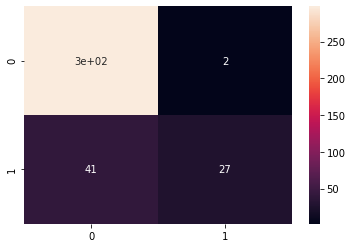

In [286]:
sns.heatmap(svcm, annot=True)

In [287]:
print(classification_report(y_test, svc_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       300
           1       0.93      0.40      0.56        68

    accuracy                           0.88       368
   macro avg       0.91      0.70      0.74       368
weighted avg       0.89      0.88      0.86       368



# Model : Random Forest Classifier with Hyper parameter tuning

In [288]:
from sklearn.ensemble import RandomForestClassifier
hptrcm =RandomForestClassifier()

In [289]:
from sklearn.model_selection import GridSearchCV

In [310]:
hasattr = RandomForestClassifier()
params = {'n_estimators' :[0,1,11,12,30,1],
          
          'criterion' : ["gini", "entropy"],
          'n_jobs' :[1,2,4] 
         }

In [312]:
gv = GridSearchCV(hptrcm, params, cv=5, scoring='accuracy')
gv.fit(x_train,y_train)

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 134, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 134, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [0, 1, 11, 12, 30, 1],
                         'n_jobs': [1, 2, 4]},
             scoring='accuracy')

In [313]:
gv.best_params_

{'criterion': 'entropy', 'n_estimators': 11, 'n_jobs': 4}

In [316]:
hptrcm=RandomForestClassifier(criterion =  'entropy', n_estimators =  11, n_jobs = 4)

In [317]:
hptrcm.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, n_jobs=4)

In [318]:
hptrcm_y_pred=hptrcm.predict(x_test)

In [319]:
hptrcm_score = accuracy_score(hptrcm_y_pred,y_test)

In [321]:
hptrcm_score

0.8260869565217391

In [369]:
hptrfcmcm =confusion_matrix(y_test,hptrcm_y_pred
                           )

In [370]:
hptrfcmcm

array([[295,   5],
       [ 59,   9]], dtype=int64)

In [371]:
print(classification_report(y_test,hptrcm_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       300
           1       0.64      0.13      0.22        68

    accuracy                           0.83       368
   macro avg       0.74      0.56      0.56       368
weighted avg       0.80      0.83      0.78       368



# Model: K-Nearest Nieghbors Classifier

In [324]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [325]:
knn_y_pred = knn.predict(x_test)

In [326]:
knn_y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [327]:
knn_score = accuracy_score(knn_y_pred,y_test)

In [328]:
knn_score

0.8315217391304348

In [329]:
knn_cm = confusion_matrix(y_test,knn_y_pred)

In [330]:
knn_cm

array([[295,   5],
       [ 57,  11]], dtype=int64)

<AxesSubplot:>

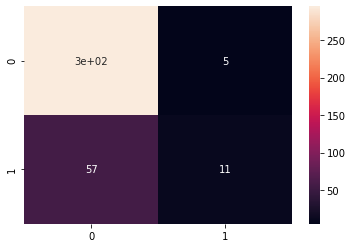

In [331]:
sns.heatmap(knn_cm, annot=True)

In [332]:
print(classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       300
           1       0.69      0.16      0.26        68

    accuracy                           0.83       368
   macro avg       0.76      0.57      0.58       368
weighted avg       0.81      0.83      0.79       368



# Model: K-Nearest Nieghbors Classifier with hyper parameter tuning

In [333]:
from sklearn.neighbors import KNeighborsClassifier
hptknn = KNeighborsClassifier()

In [334]:
from sklearn.model_selection import GridSearchCV

In [341]:
params = {'n_neighbors' : [0,0.1,10,100,150], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size' :[10,0,0.1,20,30,100] , 
          'p': [0,10,11,150,100],'weights' : ['uniform', 'distance'] }

In [342]:
gv = GridSearchCV(hptknn, params, cv=5, scoring='accuracy')
gv.fit(x_train,y_train)

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._ball_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-pack

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._ball_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-pack

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._ball_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-pack

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._ball_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-pack

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._ball_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-pack

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._ball_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-pack

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._ball_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-pack

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._ball_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-pack

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._ball_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-pack

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._ball_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-pack

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1054, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 473, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Laxman Prasad\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit fa

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 0, 0.1, 20, 30, 100],
                         'n_neighbors': [0, 0.1, 10, 100, 150],
                         'p': [0, 10, 11, 150, 100],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [343]:
gv.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 10,
 'p': 10,
 'weights': 'distance'}

In [356]:
hptknn = KNeighborsClassifier( algorithm ='auto',leaf_size = 10,n_neighbors = 10, p = 10, weights = 'distance')

In [357]:
hptknn.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=10, p=10, weights='distance')

In [358]:
hptknn_y_pred =  hptknn.predict(x_test)

In [359]:
hptknn_score = accuracy_score(y_test,hptknn_y_pred)

In [360]:
hptknn_score

0.8315217391304348

# Model Accuracies without Hyper Parameter Tuning
Logistic Model--->0.8804347826086957
Random Forest Classifier--->0.842391304347826
KNN Classifier--->0.8315217391304348

# Model Accuracies with Hyper Parameter Tuning
Support Vector Classifier--->0.8831521739130435
Random Forest Classifier--->0.8260869565217391
KNN Classifier--->0.8315217391304348 

In [361]:
lrm_score

0.8804347826086957

In [362]:
rfcm_score

0.842391304347826

In [363]:
knn_score

0.8315217391304348

In [364]:
hptknn_score

0.8315217391304348

In [365]:
hptrcm_score

0.8260869565217391

In [366]:
svc_score

0.8831521739130435

# Deep Learning Model - ANN

In [372]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'